In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import splitfolders

from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

ModuleNotFoundError: No module named 'splitfolders'

In [35]:
base_path = 'E:\\Datasets\\ASL\\asl_dataset'

categories = {  0: "0",
                1: "1",
                2: "2",
                3: "3",
                4: "4",
                5: "5",
                6: "6",
                7: "7",
                8: "8",
                9: "9",
                10: "a",
                11: "b",
                12: "c",
                13: "d",
                14: "e",
                15: "f",
                16: "g",
                17: "h",
                18: "i",
                19: "j",
                20: "k",
                21: "l",
                22: "m",
                23: "n",
                24: "o",
                25: "p",
                26: "q",
                27: "r",
                28: "s",
                29: "t",
                30: "u",
                31: "v",
                32: "w",
                33: "x",
                34: "y",
                35: "z",
            }

filenames_list = []
categories_list = []


for category in categories:
    path = os.path.join(base_path, categories[category])
    filenames = os.listdir(path)
    for filename in filenames:
        filenames_list.append(os.path.join(categories[category],filename))
    #filenames_list = filenames_list+ filenames
    categories_list = categories_list + [category]*len(filenames)

df = pd.DataFrame({'filename': filenames_list, 'category': categories_list} )
df = df.sample(frac=1).reset_index(drop=True)

df

filename  category
0       7\hand2_7_top_seg_2_cropped.jpeg         7
1       9\hand2_9_bot_seg_5_cropped.jpeg         9
2      e\hand2_e_left_seg_1_cropped.jpeg        14
3     6\hand1_6_right_seg_5_cropped.jpeg         6
4       s\hand2_s_top_seg_5_cropped.jpeg        28
...                                  ...       ...
2510  o\hand1_o_right_seg_1_cropped.jpeg        24
2511    s\hand5_s_dif_seg_5_cropped.jpeg        28
2512    y\hand2_y_dif_seg_5_cropped.jpeg        34
2513    2\hand5_2_bot_seg_1_cropped.jpeg         2
2514    m\hand1_m_top_seg_2_cropped.jpeg        22

[2515 rows x 2 columns]

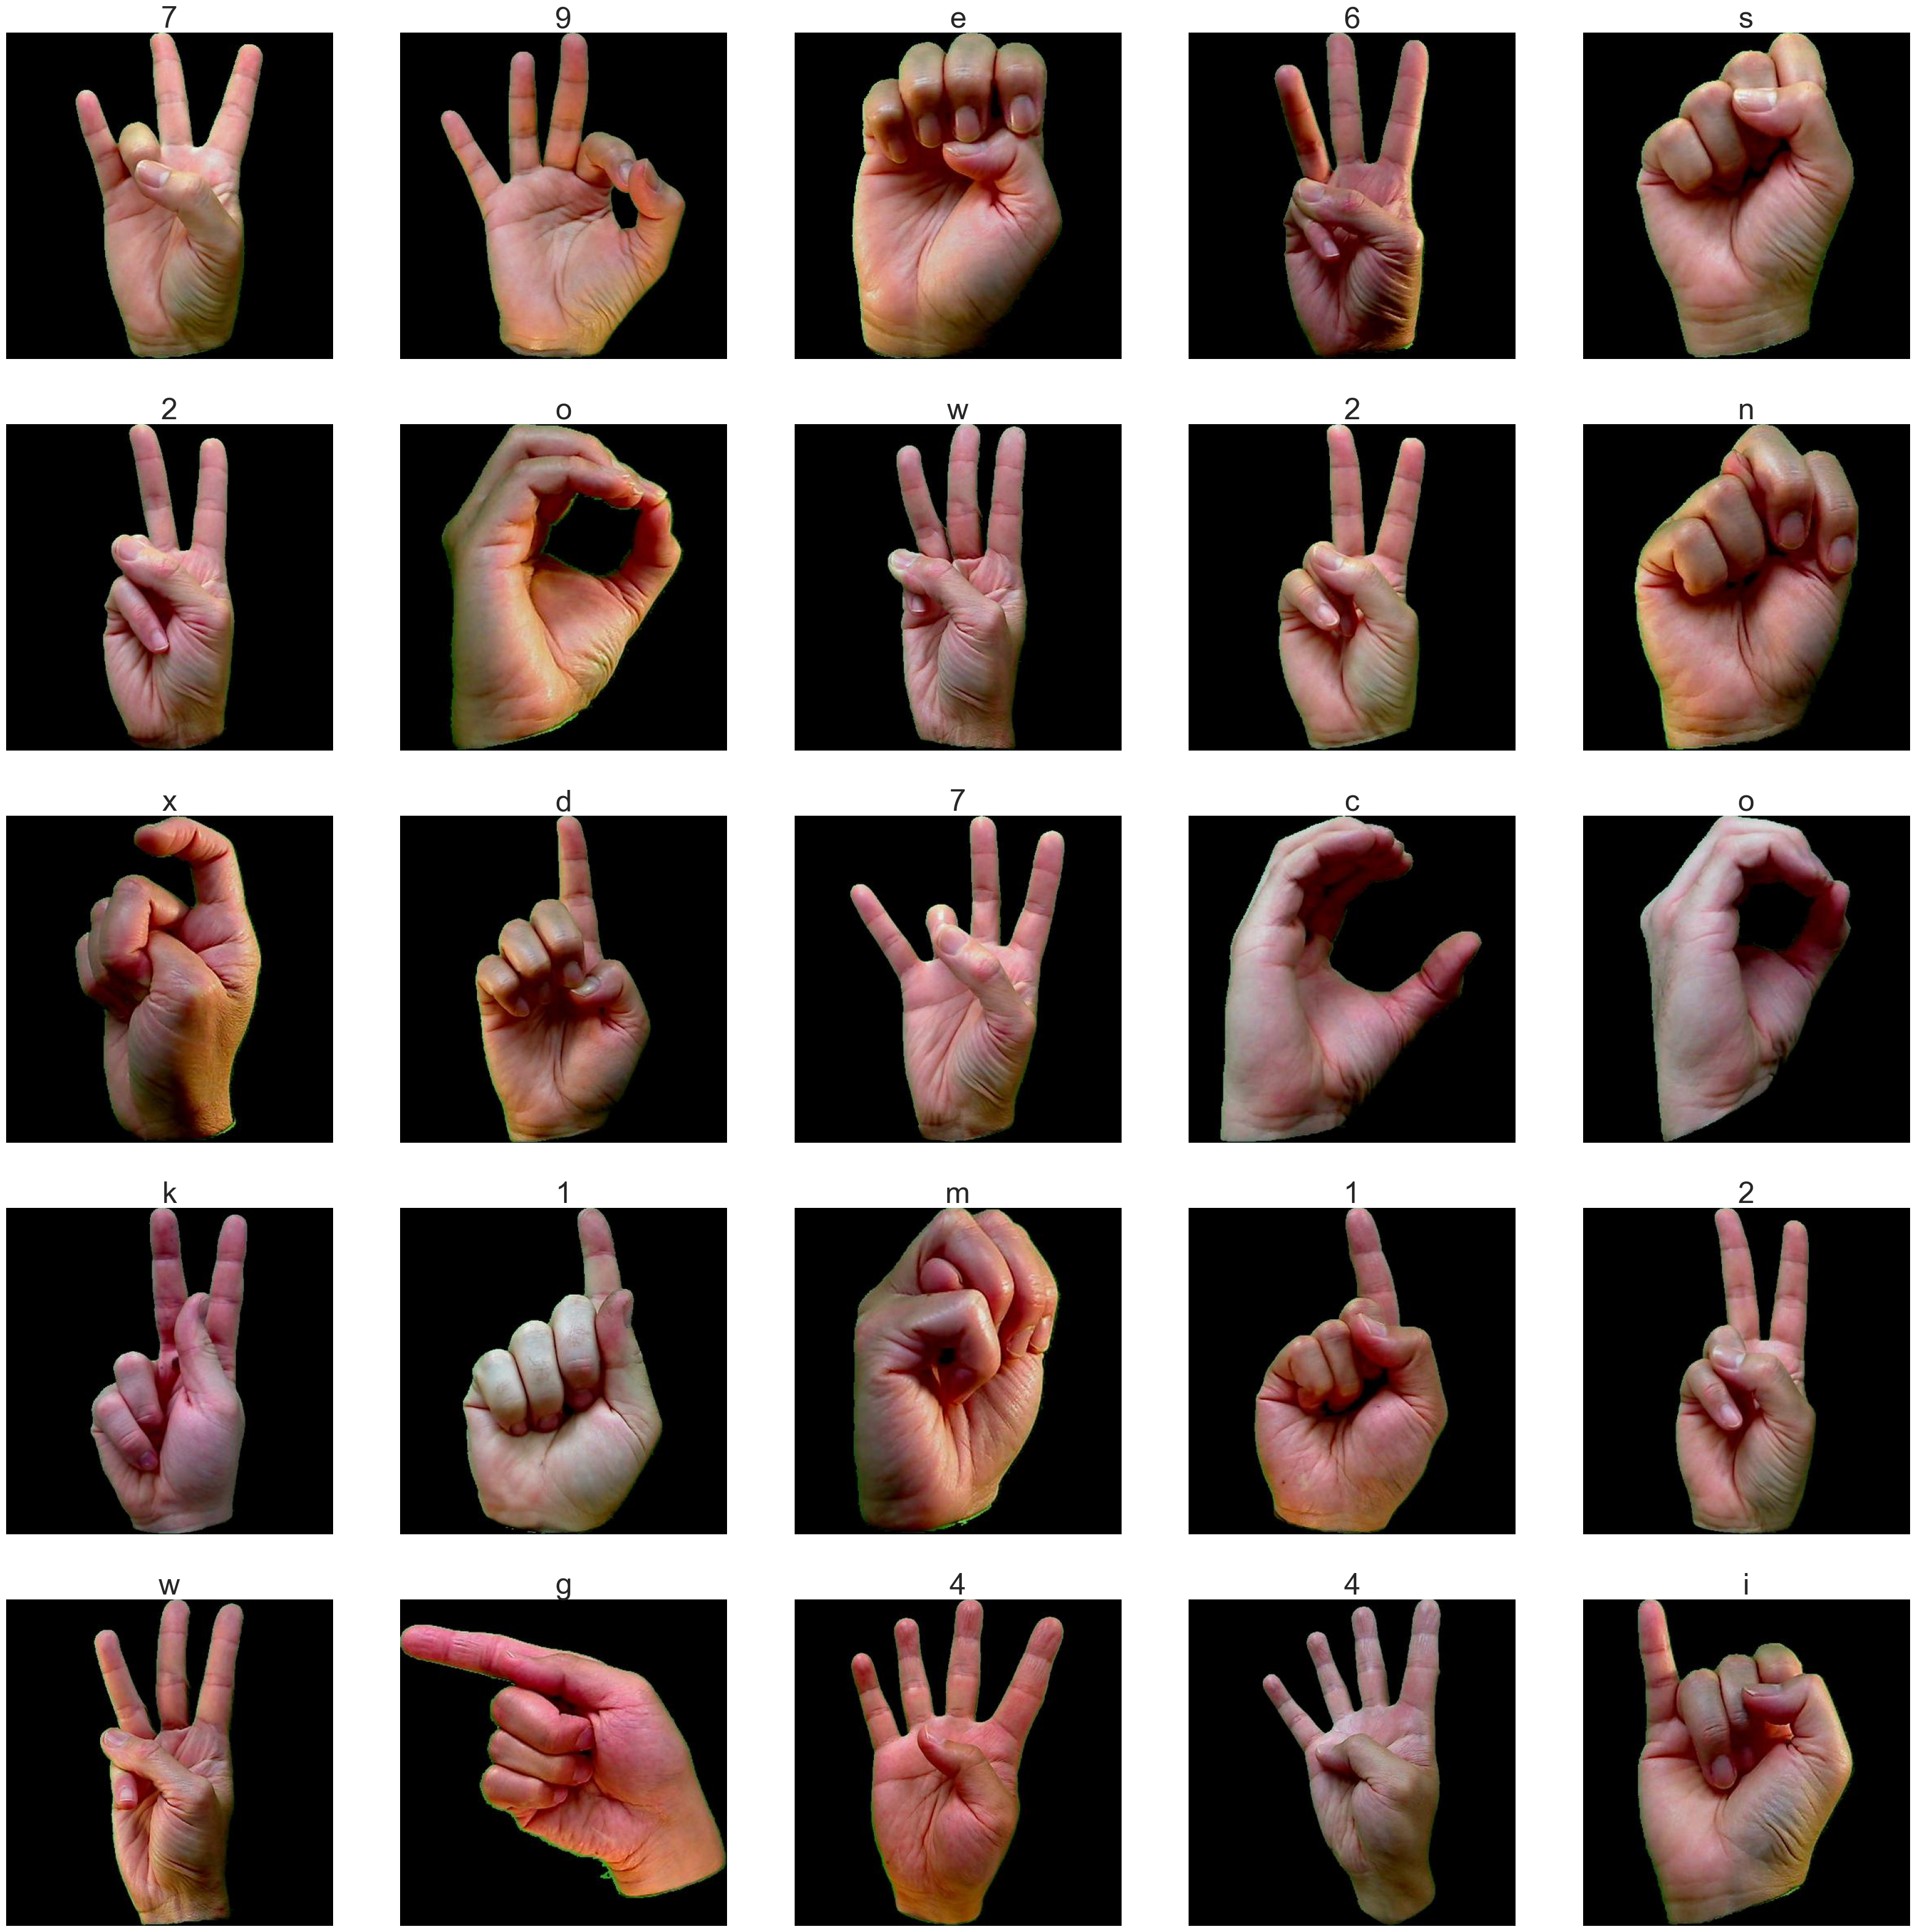

In [36]:
plt.figure(figsize=(40,40))

for i in range(25):
    path = os.path.join(base_path, df.filename[i])
    img = plt.imread(path)
    plt.subplot(5,5, i + 1)
    plt.imshow(img)
    plt.title(categories[df.category[i]],fontsize=35)
    plt.axis("off")

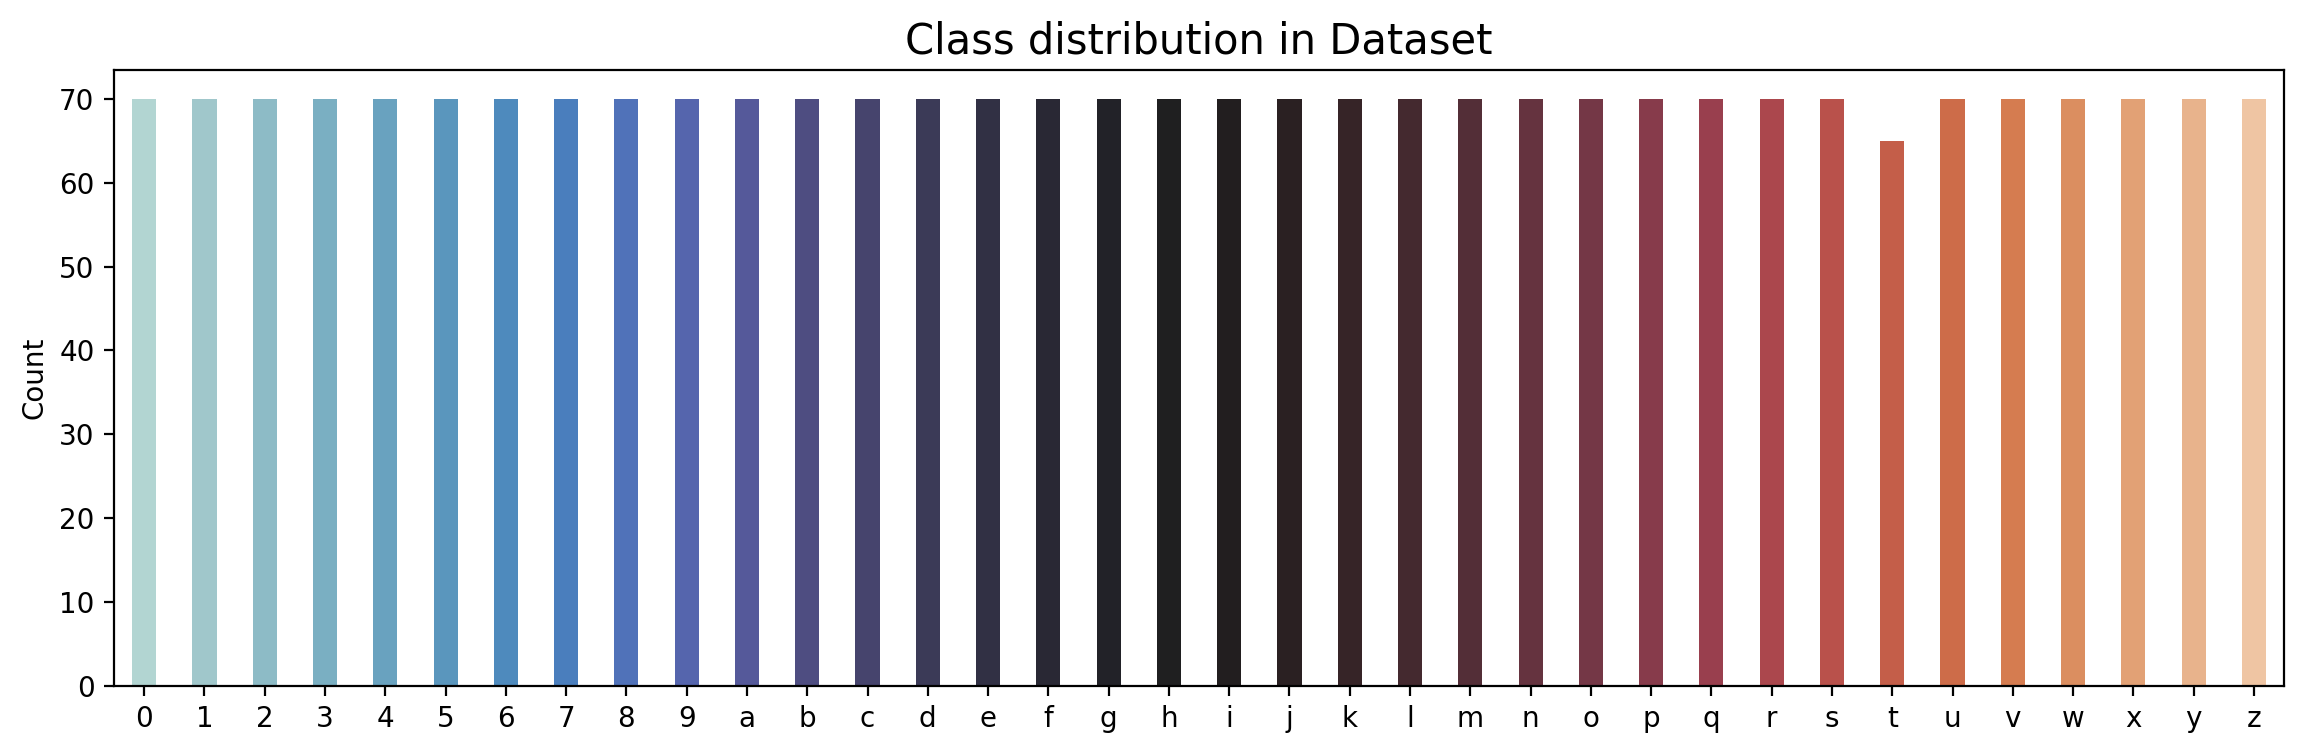

In [16]:
label, count = np.unique(df.category, return_counts=True)
uni = pd.DataFrame(data=count,index=categories.values(),columns=['Count'])

plt.figure(figsize=(14,4),dpi=200)
sns.barplot(data=uni,x=uni.index,y='Count',palette='icefire',width=0.4).set_title('Class distribution in Dataset',fontsize=15)
plt.show()

In [6]:
splitfolders.ratio('E:\\Datasets\\ASL\\asl_dataset',output='E:\\Datasets\\ASL\\asl_split', seed=1333, ratio=(0.8,0.1,0.1))

In [17]:
datagen = ImageDataGenerator(rescale = 1.0/255)

In [18]:
train_path = 'E:\\Datasets\\ASL\\asl_split\\train'
test_path = 'E:\\Datasets\\ASL\\asl_split\\test'
val_path = 'E:\\Datasets\\ASL\\asl_split\\val'

batch_size = 32
image_size = 200
img_channel = 3
n_classes = 36

In [19]:
train_data = datagen.flow_from_directory(train_path,
                                         batch_size = batch_size,
                                         target_size=(image_size, image_size),
                                         class_mode= 'categorical')

test_data = datagen.flow_from_directory(test_path,
                                         batch_size = batch_size,
                                         target_size=(image_size, image_size),
                                         class_mode= 'categorical')

val_data = datagen.flow_from_directory(val_path,
                                         batch_size = batch_size,
                                         target_size=(image_size, image_size),
                                         class_mode= 'categorical')

Found 2012 images belonging to 36 classes.
Found 252 images belonging to 36 classes.
Found 251 images belonging to 36 classes.


In [27]:
inp = tf.keras.layers.Input(shape=(200,200,3))

model = tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu')(inp)
#model = tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu')(model)
model = tf.keras.layers.MaxPool2D(padding='same')(model)
model = tf.keras.layers.Dropout(0.2)(model)

#model = tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu')(model)
model = tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu')(model)
model = tf.keras.layers.MaxPool2D(padding='same')(model)
model = tf.keras.layers.Dropout(0.3)(model)

#model = tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu')(model)
model = tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu')(model)
model = tf.keras.layers.MaxPool2D(padding='same')(model)
model = tf.keras.layers.Dropout(0.4)(model)

model = tf.keras.layers.Flatten()(model)

#model = tf.keras.layers.Dense(512, activation='relu')(model)
model = tf.keras.layers.Dropout(0.2)(model)
model = tf.keras.layers.Dense(128, activation='relu')(model)
model = tf.keras.layers.Dropout(0.3)(model)

out = tf.keras.layers.Dense(n_classes, activation='softmax')(model)

model = tf.keras.Model(inputs = [inp], outputs = out)

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_73 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 dropout_58 (Dropout)        (None, 99, 99, 32)        0         
                                                                 
 conv2d_74 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 49, 49, 64)       0         
 g2D)                                                      

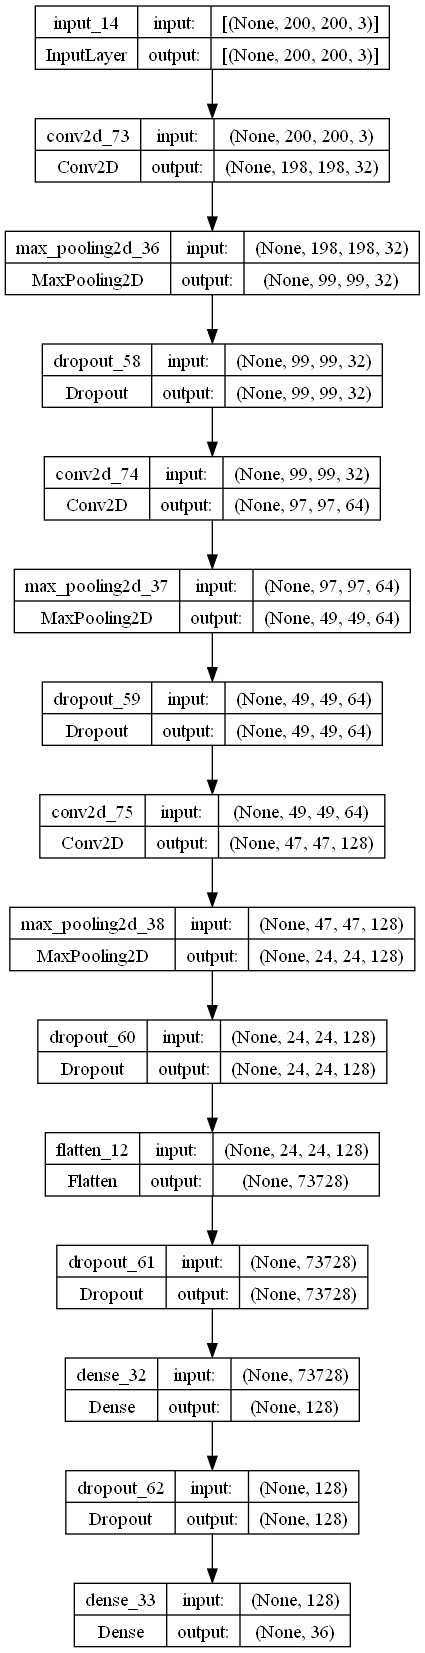

In [28]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [23]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  min_delta= 0.001,
                                                  patience=5,
                                                  restore_best_weights=True,
                                                  verbose=0)

reduce_learning_rate = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                            patience = 2,
                                                            factor = 0.5,
                                                            verbose=0)

In [29]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [30]:
asl_class = model.fit(train_data,
                      validation_data= val_data,
                      epochs=10,
                      callbacks= [early_stopping, reduce_learning_rate],
                      verbose = 1)

Epoch 1/10
63/63 [==============================] - 172s 3s/step - loss: 2.2032 - accuracy: 0.3971 - val_loss: 0.7625 - val_accuracy: 0.8367 - lr: 0.0010
Epoch 2/10
63/63 [==============================] - 150s 2s/step - loss: 0.5917 - accuracy: 0.8221 - val_loss: 0.2516 - val_accuracy: 0.9124 - lr: 0.0010
Epoch 3/10
63/63 [==============================] - 144s 2s/step - loss: 0.3320 - accuracy: 0.8936 - val_loss: 0.2053 - val_accuracy: 0.9323 - lr: 0.0010
Epoch 4/10
63/63 [==============================] - 165s 3s/step - loss: 0.1885 - accuracy: 0.9349 - val_loss: 0.1511 - val_accuracy: 0.9482 - lr: 0.0010
Epoch 5/10
63/63 [==============================] - 162s 3s/step - loss: 0.1315 - accuracy: 0.9553 - val_loss: 0.1465 - val_accuracy: 0.9442 - lr: 0.0010
Epoch 6/10
63/63 [==============================] - 152s 2s/step - loss: 0.1159 - accuracy: 0.9637 - val_loss: 0.1556 - val_accuracy: 0.9522 - lr: 0.0010
Epoch 7/10
63/63 [==============================] - 154s 2s/step - loss: 0.1

In [31]:
loss,acc = model.evaluate(train_data , verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

loss,acc = model.evaluate(val_data, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 99.25447106361389
The Loss of the model for training data is: 0.016472717747092247
The accuracy of the model for validation data is: 96.4143455028534
The Loss of the model for validation data is: 0.11676814407110214


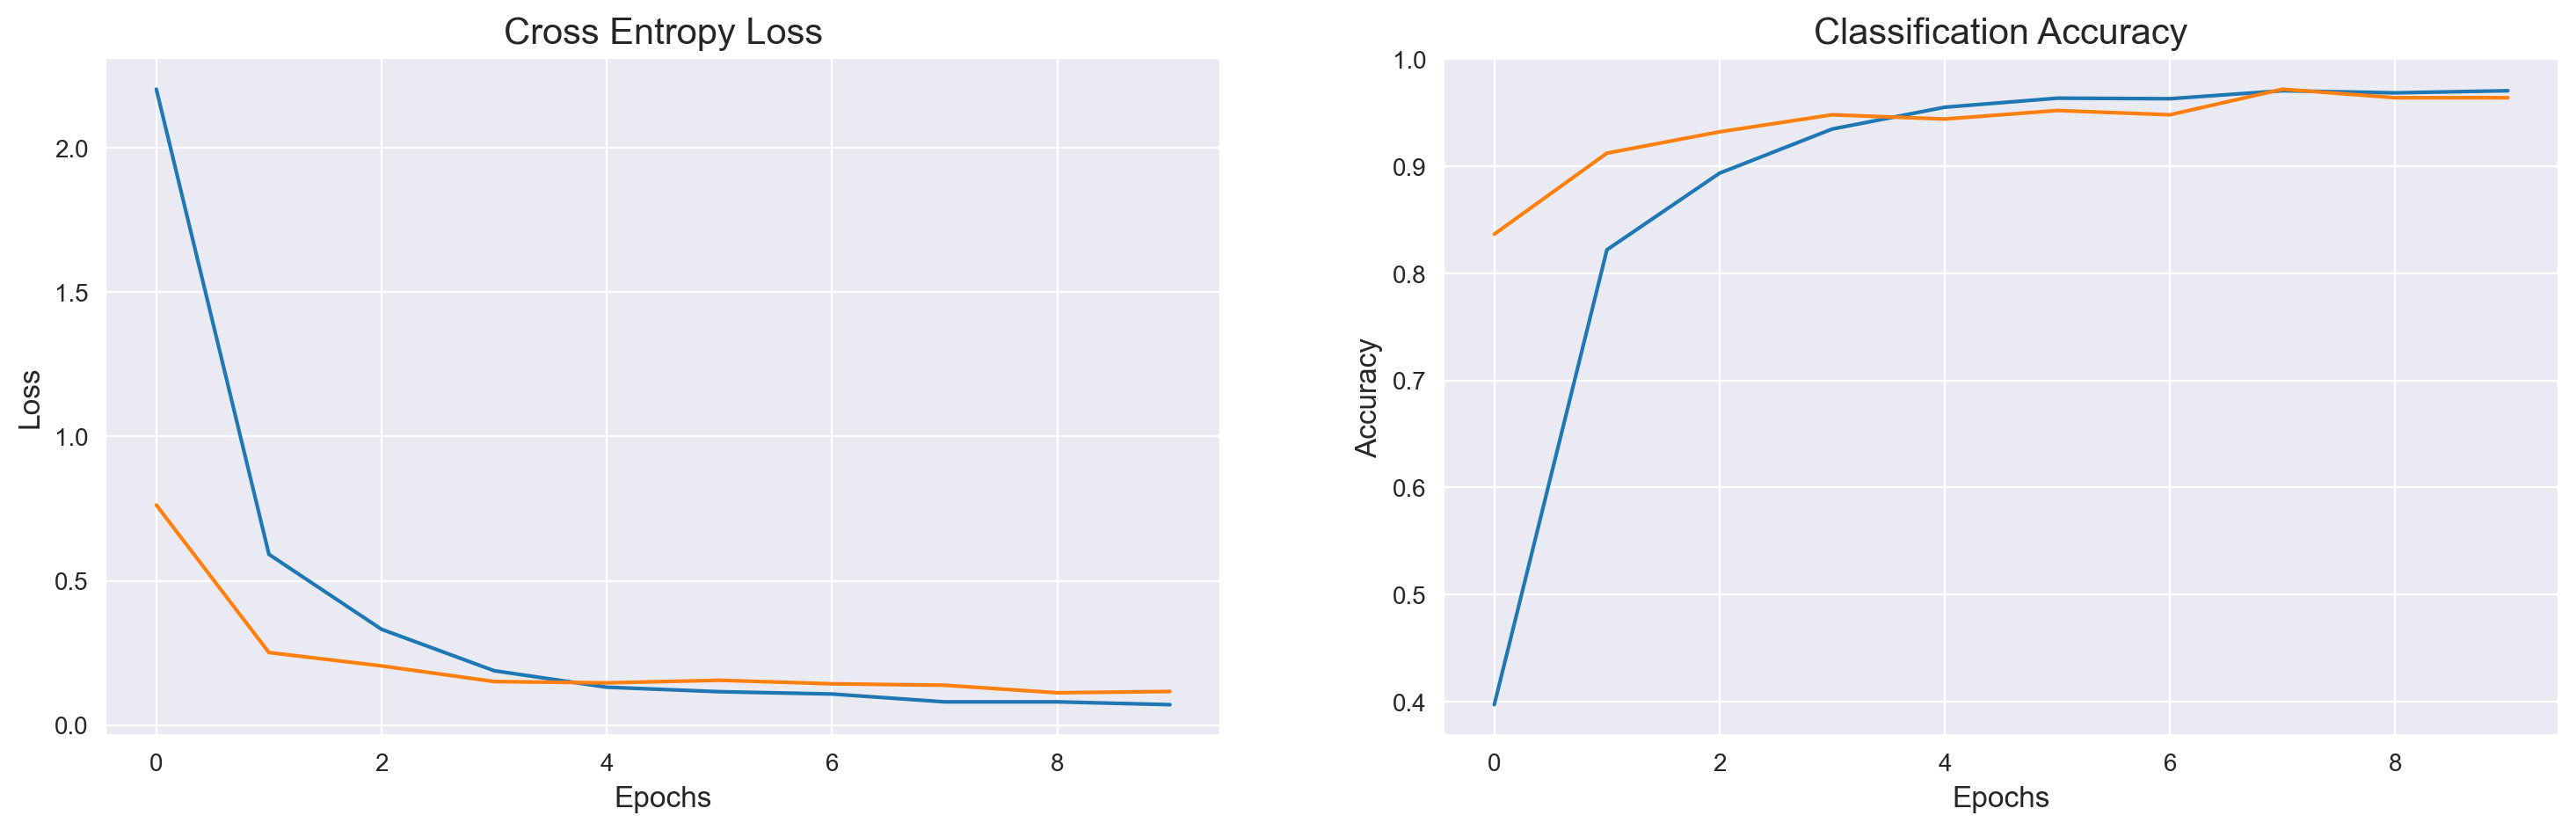

In [32]:
error = pd.DataFrame(asl_class.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

In [37]:
model.save('asl_model_1.tf')

INFO:tensorflow:Assets written to: asl_model_1.tf\assets


INFO:tensorflow:Assets written to: asl_model_1.tf\assets


In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model

cnn = tf.keras.saving.load_model(
        'E:\\Public Repositories\\Sign-Language-Translator\\Models\\ASL_Model_1.h5', custom_objects=None, compile=True, safe_mode=True
    )



In [2]:
from cvzone.HandTrackingModule import HandDetector
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image

cap = cv2.VideoCapture(0)
detector = HandDetector(maxHands=1)
safezone = 30

while True:
    success, img = cap.read()
    try:
        hands, img = detector.findHands(img)
        if hands:
            hand = hands[0]
            x,y,w,h = hand['bbox']
            imgcrop = img[y-safezone:y+h+safezone, x-safezone:x+w+safezone]
            
            imgcrop = cv2.cvtColor(imgcrop, cv2.COLOR_BGR2RGB)
            imgcrop = cv2.resize(imgcrop, (200,200))
            imgcrop = tf.keras.utils.img_to_array(imgcrop)
            imgcrop = imgcrop/255
            imgcrop = np.expand_dims(imgcrop, axis=0)
            prediction = cnn.predict(imgcrop)
            prediction = np.argmax(prediction, axis = 1)
            print(prediction)
            font = cv2.FONT_HERSHEY_SIMPLEX
            cv2.putText(imgcrop, f"{prediction}", (0,100), font)
                   
    except:
        pass
    cv2.imshow('HandDetection', img)
    cv2.waitKey(1)

1/1 [==============================] - 0s 424ms/step
[19]
1/1 [==============================] - 0s 65ms/step
[23]
1/1 [==============================] - 0s 57ms/step
[26]
1/1 [==============================] - 0s 58ms/step
[23]
1/1 [==============================] - 0s 67ms/step
[26]
1/1 [==============================] - 0s 53ms/step
[26]
1/1 [==============================] - 0s 60ms/step
[23]
1/1 [==============================] - 0s 53ms/step
[26]
1/1 [==============================] - 0s 61ms/step
[23]
1/1 [==============================] - 0s 69ms/step
[23]
1/1 [==============================] - 0s 61ms/step
[23]
1/1 [==============================] - 0s 62ms/step
[23]
1/1 [==============================] - 0s 65ms/step
[23]
1/1 [==============================] - 0s 51ms/step
[23]
1/1 [==============================] - 0s 60ms/step
[23]
1/1 [==============================] - 0s 53ms/step
[23]
1/1 [==============================] - 0s 70ms/step
[23]
1/1 [=========================

In [3]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = r"F:\Onedrive\OneDrive - vitbhopal.ac.in\Pictures\Screenshots\Screenshot 2023-10-07 191331.png"
new_img = image.load_img(img_path, target_size=(200, 200))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = cnn.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)

1/1 [==============================] - 1s 1s/step
[23]


In [5]:
import cv2
import streamlit as st
import numpy as np

# Initialize the VideoCapture object
cap = cv2.VideoCapture(0)

# Function to read and display the video stream
def main():
    st.title("OpenCV VideoCapture in Streamlit")

    if not cap.isOpened():
        st.error("Error: Unable to access the camera.")
        return

    st.image([], use_column_width=True, channels="BGR")

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Display the video frame in Streamlit
        st.image(frame, use_column_width=True, channels="BGR")

    # Release the video capture when the app is closed
    cap.release()

if __name__ == "__main__":
    main()

2023-10-07 10:16:44.677 
  command:

    streamlit run c:\Users\ASUS\.pyenv\pyenv-win\versions\3.11.0\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [4]:
s = "acb"
t = "ahcgdb"

def is_sunsequence(s,t):
    
    if len(s)>len(t): return False
    if len(s) == 0: return True
    sub = 1
    for i in range(0, len(t)-1):
        if sub <=len(s)-1:
            if s[sub] == t[i]:
                sub+=1
    return sub == len(s)
is_sunsequence(s,t)

False

In [2]:
import cv2
import numpy as np
from cvzone.HandTrackingModule import HandDetector

categories = {  0: "0",
                1: "1",
                2: "2",
                3: "3",
                4: "4",
                5: "5",
                6: "6",
                7: "7",
                8: "8",
                9: "9",
                10: "a",
                11: "b",
                12: "c",
                13: "d",
                14: "e",
                15: "f",
                16: "g",
                17: "h",
                18: "i",
                19: "j",
                20: "k",
                21: "l",
                22: "m",
                23: "n",
                24: "o",
                25: "p",
                26: "q",
                27: "r",
                28: "s",
                29: "t",
                30: "u",
                31: "v",
                32: "w",
                33: "x",
                34: "y",
                35: "z",
            }

def hand_capture(img):
    detector = HandDetector(maxHands=1)
    safezone = 120
    hands, img2 = detector.findHands(img)
    if hands:
        hand = hands[0]
        x,y,w,h = hand['bbox']
        imgcrop = img[y-safezone:y+h+safezone, x-safezone:x+w+safezone]
        return imgcrop , True
    else:
        return img , False
    
from tensorflow.keras.models import load_model
import tensorflow as tf


def load_model():
    model = tf.keras.saving.load_model(
        'asl_model_1.h5', custom_objects=None, compile=False, safe_mode=True
    )
    return model
model = load_model()    

cap = cv2.VideoCapture(0)
        
while cap.isOpened():
    ret, frame = cap.read()

    new_img , ishand = hand_capture(frame)
    if ishand:
        print(new_img)
        # img = tf.image.resize(new_img , (200 , 200))
        # img = tf.keras.preprocessing.image.img_to_array(img)
        # img = np.expand_dims(img, axis=0)
        # prediction = model.predict(img)
        # prediction = np.argmax(prediction,axis=1)
        # letter = categories[prediction[0]]
        # print(letter)
        #prediction = model.predict(crop_img)
    else :
        print("  ")
    cv2.imshow('frame' , frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

objc[1899]: Class CaptureDelegate is implemented in both /Users/klsharma22/miniconda3/envs/ml/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x2a04ae548) and /Users/klsharma22/miniconda3/envs/ml/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_videoio.3.4.16.dylib (0x2c76c0860). One of the two will be used. Which one is undefined.
objc[1899]: Class CVWindow is implemented in both /Users/klsharma22/miniconda3/envs/ml/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x2a04ae598) and /Users/klsharma22/miniconda3/envs/ml/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x28a930a68). One of the two will be used. Which one is undefined.
objc[1899]: Class CVView is implemented in both /Users/klsharma22/miniconda3/envs/ml/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x2a04ae5c0) and /Users/klsharma22/miniconda3/envs/ml/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x28a930a90). One of the two will be used. Which one is undefin

  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
[]
[[[ 66  73  70]
  [ 50  55  54]
  [ 33  38  37]
  ...
  [ 83 106 126]
  [ 86 109 131]
  [ 93 116 138]]

 [[ 64  72  69]
  [ 49  54  53]
  [ 29  34  34]
  ...
  [ 85 108 128]
  [ 89 111 134]
  [ 91 116 138]]

 [[ 62  70  67]
  [ 46  51  50]
  [ 27  32  31]
  ...
  [ 86 109 129]
  [ 89 111 134]
  [ 90 115 137]]

 ...

 [[159 178 196]
  [158 177 195]
  [158 177 195]
  ...
  [187 204 161]
  [187 204 161]
  [188 205 162]]

 [[159 178 196]
  [158 177 195]
  [158 177 195]
  ...
  [188 205 162]
  [188 205 162]
  [189 206 163]]

 [[159 178 196]
  [158 177 195]
  [157 176 194]
  ...
  [188 205 162]
  [189 206 163]
  [189 206 163]]]
[[[ 33  40  41]
  [ 33  40  41]
  [ 33  40  41]
  ...
  [ 93 118 142]
  [ 95 119 143]
  [ 97 121 146]]

 [[ 32  39  40]
  [ 32  39  40]
  [ 33  40  41]
  ...
  [ 93 118 142]
  [ 95 119 143]
  [ 97 121 146]]

 [[ 32  39  40]
  [ 32  39  40]
  [ 33  40  41]
  ...
  [ 95 119 143]
  [ 95 119 143]
  [ 97 121 146]]

 ...

 

: 